# 4. Importing JSON Data and Working with APIs
**Learn how to work with JSON data and web APIs by exploring a public dataset and getting cafe recommendations from Yelp. End by learning some techniques to combine datasets once they have been loaded into data frames.**

## Introduction to JSON
In this chapter, we'll shift our focus to data in Javascript Object Notation, or JSON, data.

### Javascript Object Notation (JSON)
As the name implies, JSON is based on Javascript, but popular programming languages have versions of the data structures JSONs use, making them easy for programs to generate and parse while still being human-readable. And because of Javascript's role in web development, JSON is a common format for transmitting data through the web. Unlike data frames, JSON data is not tabular. This makes for more efficient data storage -- if a value doesn't exist for a record, the attribute can be omitted instead of storing it with a null value. In other words, records don't all have to have the same set of attributes. Instead, data is organized into collections of objects. Objects resemble Python dictionaries: they're enclosed in curly braces and contain attribute-value pairs. One last feature of JSONs is that they can be nested -- values themselves can be objects, or lists of objects.

### Reading JSON Data
You can guess the pandas function to load a JSON into a data frame -- it's `read_json()`. Read JSON takes a string of the path to the JSON to load. This path can be to a file saved on a computer or a URL ending in dot JSON. Alternatively, you can supply JSON data directly as a string. As with flat files and spreadsheets, pandas guesses attribute data types, but you can specify them with a dictionary of column names and values and the dtype argument. JSON data can be laid out in various ways, so there is an orient keyword argument to flag uncommon layouts.

### Data Orientation
Since JSON data isn't tabular, pandas makes assumptions about how it's arranged, or oriented, to load it into a data frame. pandas automatically detects record and column orientations, which you'll encounter most often. Let's see what they look like.

### Record Orientation
A record-oriented JSON consists of a list of dictionaries, each translating to a table record. For example, this JSON of causes of death from New York City's open data site is record oriented.

### Column Orientation
To reduce file size by not repeating attribute names, a JSON may be column-oriented. The entire JSON is a dictionary. Keys are column names. Values are lists of values for that column, or dictionaries of row indices and column values, like in this rearranged version of the death causes data.

### Specifying Orientation
However, other orientations are possible. This version of the death data is split oriented, with different lists for column names, indices, and values. Let's load it to a data frame.

We import pandas, then load the data with read JSON, specifying orientation by passing one of a set of documented string values to the orient keyword argument. 
```python
import pandas ad pd
death_causes = pd.read_json('nyc_death_causes.json', orient='split')
```
When we print the data, it looks like it loaded correctly.

In [1]:
# Load pandas as pd
import pandas as pd

# Load the daily report to a data frame
pop_in_shelters = pd.read_json('dhs_daily_report.json')

# View summary stats about pop_in_shelters
print(pop_in_shelters.describe())

       adult_families_in_shelter  adults_in_families_with_children_in_shelter  \
count                1000.000000                                  1000.000000   
mean                 2074.955000                                 16487.932000   
std                   148.020238                                   848.363772   
min                  1796.000000                                 14607.000000   
25%                  1906.000000                                 15831.500000   
50%                  2129.000000                                 16836.000000   
75%                  2172.250000                                 17118.250000   
max                  2356.000000                                 17733.000000   

       children_in_families_with_children_in_shelter  \
count                                    1000.000000   
mean                                    23273.873000   
std                                       926.243984   
min                                     21291.

*When getting data from a URL, like with open data portals, be mindful of how much data is being pulled and how often you do it. Requesting lots of data can strain shared resources.*

## Work with JSON orientations
JSON isn't a tabular format, so `pandas` makes assumptions about its orientation when loading data. Most JSON data you encounter will be in orientations that `pandas` can automatically transform into a data frame.

Sometimes, like in this modified version of the Department of Homeless Services Daily Report, data is oriented differently. To reduce the file size, it has been `split` formatted. You'll see what happens when you try to load it normally versus with the `orient` keyword argument. The `try/except` block will alert you if there are errors loading the data.

- Try loading `dhs_report_reformatted.json` without any keyword arguments.

```python
try:
    # Load the JSON without keyword arguments
    df = pd.read_json('dhs_report_reformatted.json')
    
    # Plot total population in shelters over time
    df["date_of_census"] = pd.to_datetime(df["date_of_census"])
    df.plot(x="date_of_census", 
            y="total_individuals_in_shelter")
    plt.show()
    
except ValueError:
    print("pandas could not parse the JSON.")
```
```
pandas could not parse the JSON.
```

- Load `dhs_report_reformatted.json` to a data frame with `orient` specified.

```python
try:
    # Load the JSON with orient specified
    df = pd.read_json("dhs_report_reformatted.json",
                      orient='split')
    
    # Plot total population in shelters over time
    df["date_of_census"] = pd.to_datetime(df["date_of_census"])
    df.plot(x="date_of_census", 
            y="total_individuals_in_shelter")
    plt.show()
    
except ValueError:
    print("pandas could not parse the JSON.")
```

In [3]:
import matplotlib.pyplot as plt

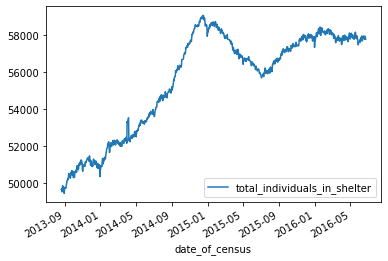

In [4]:
try:
    # Load the JSON without keyword arguments
    df = pd.read_json('dhs_daily_report.json')
    
    # Plot total population in shelters over time
    df["date_of_census"] = pd.to_datetime(df["date_of_census"])
    df.plot(x="date_of_census", 
            y="total_individuals_in_shelter")
    plt.show()
    
except ValueError:
    print("pandas could not parse the JSON.")

*In this case, `pandas` could not parse the JSON at all without the `orient` keyword. For some other orientations, like index-oriented data, the data will load with transposed column and index names.*

---
## Introduction to APIs
In this lesson, we'll turn our attention to working with web application programming interfaces, or APIs, the most common source of JSON data.

### Application Programming Interfaces
An application programming interface is a defined way for an application to communicate with other programs, and vice versa. They let programmers get data from an application without having to know about that application's database architecture. One caveat -- APIs are shared resources, and often limit how much data you can get in a specified timeframe. Using an API to get data is like using a catalog to order products. The catalog shows what's available and provides order instructions.

You send a properly formed order to the right address and get back what you asked for. Similarly, an API provides an endpoint to send requests to, and documentation describes what a request should look like, such as parameters to include.

### Requests
While there are Python libraries geared towards popular APIs, we'll use the Requests library in this course. Requests lets users send and get data from any URL, so it's not tied to any particular API. The function to retrieve data from a URL, logically, is `requests.get()`.

### requests.get()
`requests.get(url_string)` gets data from, and has optional keyword arguments that are useful for working with APIs. The `params` keyword lets you pass a dictionary of parameter names and values to customize API requests. The `headers` keyword also takes a dictionary of names and values. If the API you're using requires a user authentication key, it would be passed in the header. The result is a `response` object, containing data and metadata. We need to use the `response.json()` method to get just the JSON data.

### response.json() and pandas
Importantly, the `response.json()` returns a dictionary, which `read_json()` can't parse -- it expects a string. To load the data to a data frame, we need to use `pd.DataFrame()` instead.

### Yelp Business Search API
We'll use Requests to work with data from Yelp. Yelp lets users submit ratings and reviews for businesses and makes that data available via its APIs.

In the API documentation, we see the endpoint URL,
```python
GET https://api.yelp.com/v3/businesses/search
```

optional and required parameters to use in a request, and even a sample response. 
```
{
    "total":8228,
    "businesses":[
    {
        "rating":4,
        "price": "$",
        "phone": "+14152520800",
        "id": "E8RJKjfdcwgtyoPMjQ_Olg",
        "alias": "four-barrel-coffee-san-francisco",
...
```

Note that if we want business details, the data we need is nested under the businesses key.

### Making Requests
Let's get data from the API about bookstores in San Francisco, California. We import pandas and the Requests library, then create a variable for the API endpoint. The API documentation indicated required parameters and authorization, so we also set up a dictionary of request parameter fields and values, plus a headers dictionary of authorization info. API keys are strings used to identify the program calling the API and confirm it can make the call. They are sensitive information, so it's hidden behind the API key variable here. We pass the API url, params, and headers to requests get, and store the result as response.

```python
import requests
import pandas as pd

api_url = "https://api.yelp.com/v3/businesses/search"
# Set up parameter dictionary according to documentation
params = {"term": "bookstore",
         "location": "San Francisco"}
# Set up header dicitionary w/ API key according to documentation
headers = {"Authorization": "Bearer {}".format(api_key)}

# Call the API
response = requests.get(api_url,
                       params=params,
                       headers=headers)
```

### Parsing Responses
Since responses contain data and metadata, we use the JSON method to isolate the data. Let's check it before loading it to a data frame. We have a dictionary, with the information we want in a list under the businesses key. 
```python
# Isolate the JSON data from the response object
data = response.json()
print(data)
```

We pass data businesses to pd DataFrame, not read JSON, to create the data frame. When we check the head, we see we did get business details.
```python
# Load businesses data to a data frame
bookstores = pd.DataFrame(data['businesses'])
print(bookstores)
```

## Get data from an API
In this exercise, you'll use `requests.get()` to query the Yelp Business Search API for cafes in New York City. `requests.get()` needs a URL to get data from. The Yelp API also needs search parameters and authorization headers passed to the `params` and `headers` keyword arguments, respectively.

You'll need to extract the data from the response with its `json()` method, and pass it to `pandas`'s `DataFrame()` function to make a data frame. Note that the necessary data is under the dictionary key `"businesses"`.

- Get data about New York City cafes from the Yelp API (`api_url`) with `requests.get()`. The necessary `params` and `headers` information has been provided.
- Extract the JSON data from the response with its `json()` method, and assign it to `data`.
- Load the cafe listings to the data frame `cafes` with `pandas`'s `DataFrame()` function. The listings are under the `"businesses"` key in data.
- Print the data frame's `dtypes` to see what information you're getting.

```python
api_url = 'https://api.yelp.com/v3/businesses/search'

# Get data about NYC cafes from the Yelp API
response = requests.get(api_url, 
                        headers=headers, 
                        params=params)

# Extract JSON data from the response
data = response.json()

# Load data to a data frame
cafes = pd.DataFrame(data['businesses'])

# View the data's dtypes
print(cafes.dtypes)
```

```
alias             object
categories        object
coordinates       object
display_phone     object
distance         float64
id                object
image_url         object
is_closed           bool
location          object
name              object
phone             object
price             object
rating           float64
review_count       int64
transactions      object
url               object
dtype: object
```

## Set API parameters
Formatting parameters to get the data you need is an integral part of working with APIs. These parameters can be passed to the `get()` function's `params` keyword argument as a dictionary.

The Yelp API requires the `location` parameter be set. It also lets users supply a `term` to search for. You'll use these parameters to get data about cafes in NYC, then process the result to create a data frame.

- Create a dictionary, `parameters`, with the `term` and `location` parameters set to search for `"cafe"`s in `"NYC"`.
- Query the Yelp API (`api_url`) with `requests`'s `get()` function and the `headers` and `params` keyword arguments set. Save the result as `response`.
- Extract the JSON data from `response` with the appropriate method. Save the result as `data`.
- Load the `"businesses"` values in `data` to the data frame `cafes` and print the head.

```python
# Create dictionary to query API for cafes in NYC
parameters = {'term': 'cafe',
          	  'location': 'NYC'}

# Query the Yelp API with headers and params set
response = requests.get(api_url,
                        headers=headers,
                        params=parameters)

# Extract JSON data from response
data = response.json()

# Load "businesses" values to a data frame and print head
cafes = pd.DataFrame(data['businesses'])
print(cafes.head())
```

```
                         alias                                         categories                                        coordinates   display_phone     distance  ... price rating  review_count  \
0       white-noise-brooklyn-2     [{'alias': 'coffee', 'title': 'Coffee & Tea'}]  {'latitude': 40.6893582571548, 'longitude': -7...                  1856.127036  ...   NaN    4.5            15   
1          devocion-brooklyn-3  [{'alias': 'coffee', 'title': 'Coffee & Tea'},...     {'latitude': 40.68857, 'longitude': -73.98334}  (718) 285-6180  2087.816949  ...    $$    4.0            73   
2   coffee-project-ny-new-york     [{'alias': 'coffee', 'title': 'Coffee & Tea'}]     {'latitude': 40.72699, 'longitude': -73.98922}  (212) 228-7888  2435.843426  ...    $$    4.5           630   
3  spreadhouse-cafe-new-york-3  [{'alias': 'cafes', 'title': 'Cafes'}, {'alias...     {'latitude': 40.71891, 'longitude': -73.98585}  (646) 524-6353  1657.232800  ...     $    4.0           380   
4             usagi-ny-dumbo-7  [{'alias': 'bookstores', 'title': 'Bookstores'...     {'latitude': 40.70383, 'longitude': -73.98691}  (718) 801-8037   635.781863  ...    $$    4.5            57   

  transactions                                                url  
0           []  https://www.yelp.com/biz/white-noise-brooklyn-...  
1           []  https://www.yelp.com/biz/devocion-brooklyn-3?a...  
2           []  https://www.yelp.com/biz/coffee-project-ny-new...  
3           []  https://www.yelp.com/biz/spreadhouse-cafe-new-...  
4           []  https://www.yelp.com/biz/usagi-ny-dumbo-7?adju...  

[5 rows x 16 columns]
```

*Notice that some of the values are themselves dictionaries, making them hard to analyze.*

## Set request headers
Many APIs require users provide an API key, obtained by registering for the service. Keys typically are passed in the request header, rather than as parameters.

The [Yelp API documentation](https://www.yelp.com/developers/documentation/v3/authentication) says "To authenticate API calls with the API Key, set the `Authorization` HTTP header value as `Bearer API_KEY`."

You'll set up a dictionary to pass this information to `get()`, call the API for the highest-rated cafes in NYC, and parse the response.Set request headers

- Create a dictionary, `headers`, that passes the formatted key string to the `"Authorization"` header value.
- Query the Yelp API (`api_url`) with `get()` and the necessary headers and parameters. Save the result as `response`.
- Extract the JSON data from `response`. Save the result as `data`.
- Load the `"businesses"` values in `data` to the data frame `cafes` and print the `names` column.

```python
# Create dictionary that passes Authorization and key string
headers = {'Authorization': "Bearer {}".format(api_key)}

# Query the Yelp API with headers and params set
response = requests.get(api_url,
                        headers=headers,
                        params=params)

# Extract JSON data from response
data = response.json()

# Load "businesses" values to a data frame and print names
cafes = pd.DataFrame(data['businesses'])
print(cafes.name)
```

```
0             Coffee Project NY
1                Urban Backyard
2              Saltwater Coffee
3                 Bird & Branch
4                  Bibble & Sip
5             Coffee Project NY
6                        Burrow
7                   Cafe Patoro
8                     Sweatshop
9                       Round K
10               Kobrick Coffee
11            Kaigo Coffee Room
12              Absolute Coffee
13                     Devocion
14                The Uncommons
15                      Butler 
16              Cafe Hanamizuki
17    Brooklyn Roasting Company
18             Takahachi Bakery
19              Happy Bones NYC
Name: name, dtype: object
```

*API keys are employed to track and moderate API usage. Be sure to keep keys private.*

---
## Working with nested JSONs
In the previous lessons, we focused on getting data from JSON files and APIs. Now, we'll turn our attention to restructuring nested JSON data.

### Nested JSONs
Recall that JSONs contain objects with attribute-value pairs. A JSON is nested when a value is itself an object.

The Yelp data has several examples of nesting.

- The coordinates and location attributes have objects for values.
- Categories' values are lists of objects.

And these records are all nested under businesses.

Checking these columns in our data frame, we see dictionaries. 
```python
# Print columns containing nested data
print(bookstores[['categories', 'coordinates', 'location']].head(3))
```

The data would be easier to work with if nested attributes were in their own columns. Fortunately, pandas has a function to flatten nested JSONs. Unfortunately, it's in a submodule that doesn't normally load when importing pandas.

### pandas.io.json
The `pandas.io.json` submodule contains functions for reading and writing JSON beyond those in the primary pandas package, but it has to be imported explicitly. We'll use its `json.normalize()` function to flatten nested data. JSON normalize takes a dictionary or list of dictionaries. This means that JSONs that load with `pd.DataFrame()` will load with JSON normalize. It returns a data frame. Nested attribute column names follow the default pattern `attribute.nestedattribute`. The dot separator interferes with pandas' dot notation for column selection, so it's advisable to specify a different separator, like underscore, with the `sep` argument.

### Loading Nested JSON Data
Let's use JSON normalize to flatten nested data as we load it. We import pandas and Requests, plus JSON normalize from pandas dot io dot json. We create a variable for the API endpoint, as well as header and parameter dictionaries. Then we pass those to requests get, and isolate the data with the response's JSON method.
```python
import pandas as pd
import requests
from pandas.io.json import json_normalize

# Set up headers, parameters, and API endpoint
api_url = 'https://api.yelp.com/v3/businesses/search'
headers = {'Authorization': 'Bearer {}'.format(api_key)}
paras = {'term': 'bookstore',
         'location': 'San Francisco'}

# Make the API call and extracy the JSON data
response = requests.get(api_url,
                        headers=headers,
                        params=params)
data = response.json()
```
We pass the data nested under businesses to JSON normalize, specifying underscores as the separator, and assign the resulting data frame to bookstores. Printing the data frame's column names shows that nested attributes have their own columns, like coordinates underscore latitude.
```python
# Flatten data and load to data frame, with _ separators
bookstores = json_normalize(data['businesses'], sep='_')
print(list(bookstores))
```

### Deeply Nested Data
Categories, however, is still nested.
```python
print(bookstores.categories.head())
```
There are a few approaches for deeply nested data. You may write a custom flattening function, or decide it's irrelevant to the analysis and leave it be. Another option is to use `json.normalize`'s `record_path`, `meta`, and `meta_prefix` arguments. Record path takes a string or list of strings of attributes to the nested data, like listing folders in a file path. Meta takes a list of higher-level attributes to include in the resulting data frame. Nested data can be flattened by passing their record paths as sub-lists. To make clear what came from where and avoid duplicate column names, specify a meta prefix.

Let's see this in action with categories. We pass the businesses data to JSON normalize, and specify the separator. We set record path to categories. We get business names, aliases, ratings and coordinates with the meta argument. To flatten coordinates, we supply sub-lists containing paths to latitude and longitude. Businesses and categories both have alias columns, so we set a meta prefix to differentiate them.
```python
# Flatten categories data, bring in business details
df = json_normalize(data['businesses'],
                    sep='_',
                    record_path='categories',
                    meta=['name',
                          'alias',
                          'rating',
                          ['coordinates', 'latitude'],
                          ['coordinates', 'longitude']],
                    meta_prefix='biz_')
```

Viewing the data, we see it's totally flat, but businesses with multiple categories repeat. Depending on the use case, this may be fine, or duplicates may need to be removed.

## Flatten nested JSONs
A feature of JSON data is that it can be nested: an attribute's value can consist of attribute-value pairs. This nested data is more useful unpacked, or flattened, into its own data frame columns. The `pandas.io.json` submodule has a function, `json_normalize()`, that does exactly this.

The Yelp API response data is nested. Your job is to flatten out the next level of data in the `coordinates` and `location` columns.

- Load the `json_normalize()` function from `pandas`' `io.json` submodule.
- Isolate the JSON data from `response` and assign it to `data`.
- Use `json_normalize()` to flatten and load the businesses data to a data frame, `cafes`. Set the `sep` argument to use underscores (`_`), rather than periods.
- Show the data head.

```python
# Load json_normalize()
from pandas.io.json import json_normalize

# Isolate the JSON data from the API response
data = response.json()

# Flatten business data into a data frame, replace separator
cafes = json_normalize(data['businesses'], sep='_')

# View data
print(cafes.head())
```

```
                         alias                                         categories  coordinates_latitude  coordinates_longitude   display_phone  ...  price rating review_count  transactions  \
0       white-noise-brooklyn-2     [{'alias': 'coffee', 'title': 'Coffee & Tea'}]             40.689358             -73.988415                  ...    NaN    4.5           15            []   
1          devocion-brooklyn-3  [{'alias': 'coffee', 'title': 'Coffee & Tea'},...             40.688570             -73.983340  (718) 285-6180  ...     $$    4.0           73            []   
2   coffee-project-ny-new-york     [{'alias': 'coffee', 'title': 'Coffee & Tea'}]             40.726990             -73.989220  (212) 228-7888  ...     $$    4.5          630            []   
3  spreadhouse-cafe-new-york-3  [{'alias': 'cafes', 'title': 'Cafes'}, {'alias...             40.718910             -73.985850  (646) 524-6353  ...      $    4.0          380            []   
4             usagi-ny-dumbo-7  [{'alias': 'bookstores', 'title': 'Bookstores'...             40.703830             -73.986910  (718) 801-8037  ...     $$    4.5           57            []   

                                                 url  
0  https://www.yelp.com/biz/white-noise-brooklyn-...  
1  https://www.yelp.com/biz/devocion-brooklyn-3?a...  
2  https://www.yelp.com/biz/coffee-project-ny-new...  
3  https://www.yelp.com/biz/spreadhouse-cafe-new-...  
4  https://www.yelp.com/biz/usagi-ny-dumbo-7?adju...  

[5 rows x 24 columns]
```

*Notice that by accessing `data['businesses']` we're already working one level down the nested structure. data itself could be flattened with `json_normalize()`.*

## Handle deeply nested data
Last exercise, you flattened data nested down one level. Here, you'll unpack more deeply nested data.

The `categories` attribute in the Yelp API response contains lists of objects. To flatten this data, you'll employ `json_normalize()` arguments to specify the path to `categories` and pick other attributes to include in the data frame. You should also change the separator to facilitate column selection and prefix the other attributes to prevent column name collisions. We'll work through this in steps.

- Use `json_normalize()` to flatten records under the `businesses` key in `data`, setting underscores (`_`) as separators.

```python
# Flatten businesses records and set underscore separators
flat_cafes = json_normalize(data['businesses'], sep='_')

# View the data
print(flat_cafes.head())
```

```
                         alias                                         categories  coordinates_latitude  coordinates_longitude   display_phone  ...  price rating review_count  transactions  \
0       white-noise-brooklyn-2     [{'alias': 'coffee', 'title': 'Coffee & Tea'}]             40.689358             -73.988415                  ...    NaN    4.5           15            []   
1          devocion-brooklyn-3  [{'alias': 'coffee', 'title': 'Coffee & Tea'},...             40.688570             -73.983340  (718) 285-6180  ...     $$    4.0           73            []   
2   coffee-project-ny-new-york     [{'alias': 'coffee', 'title': 'Coffee & Tea'}]             40.726990             -73.989220  (212) 228-7888  ...     $$    4.5          630            []   
3  spreadhouse-cafe-new-york-3  [{'alias': 'cafes', 'title': 'Cafes'}, {'alias...             40.718910             -73.985850  (646) 524-6353  ...      $    4.0          380            []   
4             usagi-ny-dumbo-7  [{'alias': 'bookstores', 'title': 'Bookstores'...             40.703830             -73.986910  (718) 801-8037  ...     $$    4.5           57            []   
    
                                                 url  
0  https://www.yelp.com/biz/white-noise-brooklyn-...  
1  https://www.yelp.com/biz/devocion-brooklyn-3?a...  
2  https://www.yelp.com/biz/coffee-project-ny-new...  
3  https://www.yelp.com/biz/spreadhouse-cafe-new-...  
4  https://www.yelp.com/biz/usagi-ny-dumbo-7?adju...  
    
[5 rows x 24 columns]
```

- Specify the `record_path` to the `categories` data.

```python
# Specify record path to get categories data
flat_cafes = json_normalize(data['businesses'],
                            sep='_',
                    		record_path='categories')

# View the data
print(flat_cafes.head())
```

```
              alias              title
0            coffee       Coffee & Tea
1            coffee       Coffee & Tea
2  coffeeroasteries  Coffee Roasteries
3             cafes              Cafes
4            coffee       Coffee & Tea
```

- Set the `meta` keyword argument to get business `name`, `alias`, `rating`, and the attributes nested under `coordinates`: `latitude` and `longitude`.
- Add `"biz_"` as a `meta_prefix` to prevent duplicate column names.

```python
# Load other business attributes and set meta prefix
flat_cafes = json_normalize(data['businesses'],
                            sep='_',
                    		record_path='categories',
                    		meta=['name', 
                                  'alias',  
                                  'rating',
                          		  ['coordinates', 'latitude'], 
                          		  ['coordinates', 'longitude']],
                    		meta_prefix='biz_')

# View the data
print(flat_cafes.head())
```

```
              alias              title           biz_name                   biz_alias  biz_rating  biz_coordinates_latitude  biz_coordinates_longitude
0            coffee       Coffee & Tea        White Noise      white-noise-brooklyn-2         4.5                 40.689358                 -73.988415
1            coffee       Coffee & Tea           Devocion         devocion-brooklyn-3         4.0                 40.688570                 -73.983340
2  coffeeroasteries  Coffee Roasteries           Devocion         devocion-brooklyn-3         4.0                 40.688570                 -73.983340
3             cafes              Cafes           Devocion         devocion-brooklyn-3         4.0                 40.688570                 -73.983340
4            coffee       Coffee & Tea  Coffee Project NY  coffee-project-ny-new-york         4.5                 40.726990                 -73.989220
```

*Naming meta columns can get tedious for datasets with many attributes, and code is susceptible to breaking if column names or nesting levels change. In such cases, you may have to write a custom function and employ techniques like recursion to handle the data.*

---
## Combining multiple datasets
So far, you've built pipelines to individual data sources. However, projects commonly draw data from multiple places. In this lesson, we'll step back from JSON to look at pandas methods for combining datasets.

### Appending
You encountered the method for adding rows from one data frame to another when compiling multiple spreadsheets -- it's `append()`. Append is a data frame method that takes the data frame to add on as an argument. This syntax looks like `df1.append(df2)`. If the data frames use pandas' default index of row numbers, you should also set append's `ignore_index` parameter to `True` so that the resulting data frame has relabeled rows, rather than two row 0s, two row 1s, and so on.
```python
# Get first 20 bookstore results
params = {'term': 'bookstore',
         'location': 'San Francisco'}
first_results = requests.get(api_url,
                             headers=headers,
                             params=params).json()

first_20_bookstores = json_normalize(first_results['businesses'],
                                     sep='_')
print(frist_20_bookstores.shape)
```
APIs commonly limit the number of records returned in a single call to manage resource usage. The Yelp API returns 20 records at a time by default, but we can set the offset parameter to get the next 20.
```python
# Get the next 20 bookstore
params['offset'] = 20
next_results = requests.get(api_url,
                             headers=headers,
                             params=params).json()

next_20_bookstores = json_normalize(next_results['businesses'],
                                     sep='_')
print(next_20_bookstores.shape)
```
From there, we append the second data frame to the first, setting ignore index to true to relabel rows. We can print the name column to confirm the resulting data frame has 40 stores.
```python
# Put bookstore datasets together, renumber rows
bookstores = first_20_bookstores.append(next_20_bookstores,
                                        ignore_index=True)
print(bookstores)
```
```
0                     City Lights Bookstore
1                    Alexander Book Company
2                         Borderlands Books
3                           Alley cat Books
4                           Dog Eared Books
...                                     ...
35                             Forest Books
36       San Francisco Center For The Books
37                   KingSpoke - Book Store
38                    Eastwind Books & Arts
39                              My Favorite
Name: name, dtype: object
```

### Merging
Another way to combine data is by adding columns along a shared key column, like in the SQL joins covered last chapter. While SQL joins are only an option for tables in the same database server, `pandas` has its own way to join data -- `merge()`.

`merge()` is both a pandas function, like read csv, and a data frame method, like append. We'll use the data frame method, which takes the name of the other data frame to merge. It also needs strings of the columns to merge on. If key column names match in both data frames, you can specify the name with the `on` keyword argument. If they're different, use `left_on` and `right_on` to specify keys in the first and second data frames, respectively. Note that the key columns must be the same data type for the merge to work properly.

Let's illustrate with simplified versions of the call counts and weather datasets. 
```python
call_counts.head()
```
```
  created_date  call_counts
0   01/01/2018         4597
1   01/02/2018         4362
2   01/03/2018         3045
3   01/04/2018         3374
4   01/05/2018         4333
```
```python
weather.head()
```
```
         date   tmax   tmin
0  12/01/2017     52     42
1  12/02/2017     48     39
2  12/03/2017     48     42
3  12/04/2017     51     40
4  12/05/2017     61     50
```

They each have a date column, which we can use as the merge key.

We pass weather to call counts' merge method, specifying to merge on created date in call counts and date in weather, and check the head to confirm the merge worked.
```python
# Merge weather into call counts on date columns
merged = call_counts.merge(weather,
                           left_on='created_date',
                           right_on='date')
print(merged)
```
```
  created_date  call_counts        date   tmax   tmin
0   01/01/2018         4597  12/01/2018     19      7
1   01/02/2018         4362  12/02/2018     26     13
2   01/03/2018         3045  12/03/2018     30     16
3   01/04/2018         3374  12/04/2018     29     19
4   01/05/2018         4333  12/05/2018     19      9
```

Let's take a closer look at the result. By default, `merge()` returns only rows with key values that exist in both datasets. There aren't call counts for December, so none of the December weather data appears here. The call and weather data have what is called a one-to-one relationship -- each call count record can be linked to only one weather record by date, and vice versa -- so the result has one record for each date in both datasets. If you merge data where a record in one data frame can be linked to multiple records in the other, the result will have one row for each possible link.

Append and merge are just the tip of the iceberg when it comes to pandas' data wrangling capabilities, but they're useful functions to start with, especially when combined with all the other tools you have for building data pipelines. 

## Append data frames
In this exercise, you’ll practice appending records by creating a dataset of the 100 highest-rated cafes in New York City according to Yelp.

APIs often limit the amount of data returned, since sending large datasets can be time- and resource-intensive. The Yelp Business Search API limits the results returned in a call to 50 records. However, the `offset` parameter lets a user retrieve results starting after a specified number. By modifying the offset, we can get results 1-50 in one call and 51-100 in another. Then, we can append the data frames.

The 50 top-rated cafes are already in a data frame, `top_50_cafes`.

- Add an `"offset"` parameter to `params` so that the Yelp API call will get cafes 51-100.
- Append the results of the API call to `top_50_cafes`, setting `ignore_index` so rows will be renumbered.
- Print the shape of the resulting data frame, `cafes`, to confirm there are 100 records.

```python
# Add an offset parameter to get cafes 51-100
params = {"term": "cafe", 
          "location": "NYC",
          "sort_by": "rating", 
          "limit": 50,
          "offset": 50}

result = requests.get(api_url, headers=headers, params=params)
next_50_cafes = json_normalize(result.json()["businesses"])

# Append the results, setting ignore_index to renumber rows
cafes = top_50_cafes.append(next_50_cafes, ignore_index=True)

# Print shape of cafes
print(cafes.shape)
```

```
(100, 24)
```

*If you were putting multiple data frames together, one option would be to start with an empty data frame and use a for or while loop to append additional ones.*

## Merge data frames
In the last exercise, you built a dataset of the top 100 cafes in New York City according to Yelp. Now, you'll combine that with demographic data to investigate which neighborhood has the most good cafes per capita.

To do this, you'll merge two datasets with the DataFrame `merge()` method. The first, `crosswalk`, is a crosswalk between ZIP codes and Public Use Micro Data Sample Areas (PUMAs), which are aggregates of census tracts and correspond roughly to NYC neighborhoods. Then, you'll merge in `pop_data`, which contains 2016 population estimates for each PUMA.

### Question
Explore the `cafes` and `crosswalk` data frames in the console. Which columns should be used as join keys?

```python
print(cafes.dtypes)
```

```
alias                        object
categories                   object
coordinates_latitude        float64
coordinates_longitude       float64
display_phone                object
distance                    float64
id                           object
image_url                    object
is_closed                      bool
location_address1            object
location_address2            object
location_address3            object
location_city                object
location_country             object
location_display_address     object
location_state               object
location_zip_code            object
name                         object
phone                        object
price                        object
rating                      float64
review_count                  int64
transactions                 object
url                          object
dtype: object
```

```python
print(crosswalk.dtypes)
```

```
zipcode       object
ziptype       object
postalcity    object
zcta5          int64
bcode          int64
note          object
puma          object
pumaname      object
dtype: object
```

1. ~`location_zip_code` in `cafes` and `zcta5` in `crosswalk`~
2. ~`zipcode` in both~
3. ~`location.zipcode` in `cafes` and `zipcode` in `crosswalk`~
4. **`location_zip_code` in `cafes` and `zipcode` in `crosswalk`**

**Answer: 4**

### Question
Explore the `crosswalk` and `pop_data` data frames in the console. Which columns should be used as join keys?

```python
print(crosswalk.dtypes)
```

```
zipcode       object
ziptype       object
postalcity    object
zcta5          int64
bcode          int64
note          object
puma          object
pumaname      object
dtype: object
```

```python
print(pop_data.dtypes)
```

```
geo_type              object
geog_name             object
puma                  object
borough               object
total_pop_estimate    object
total_pop_moe         object
dtype: object
```

1. ~`pumaname` in `crosswalk` and `puma` in `pop_data`~
2. **`puma` in both**
3. ~`zipcode` in both~
4. ~`pumaname` in `crosswalk` and `geog_name` in `pop_data`~

**Answer: 2**

- Use the DataFrame method to merge `cafes` and `crosswalk` on `location_zip_code` and `zipcode`, respectively. Assign the result to `cafes_with_pumas`.
- Merge `pop_data` into `cafes_with_pumas` on their `puma` fields. Save the result as `cafes_with_pop`.

```python
# Merge crosswalk into cafes on their zip code fields
cafes_with_pumas = cafes.merge(crosswalk,
                               left_on='location_zip_code',
                               right_on='zipcode')

# Merge pop_data into cafes_with_pumas on puma field
cafes_with_pop = cafes_with_pumas.merge(pop_data, 
                                        left_on='puma', 
                                        right_on='puma')

# View the data
print(cafes_with_pop.head())
```

```
                        alias                                         categories  coordinates_latitude  coordinates_longitude   display_phone  ...  geo_type  \
0  coffee-project-ny-new-york     [{'alias': 'coffee', 'title': 'Coffee & Tea'}]             40.726990             -73.989220  (212) 228-7888  ...  PUMA2010   
1   saltwater-coffee-new-york     [{'alias': 'coffee', 'title': 'Coffee & Tea'}]             40.730458             -73.983918  (917) 881-2245  ...  PUMA2010   
2   daily-provisions-new-york  [{'alias': 'cafes', 'title': 'Cafes'}, {'alias...             40.737680             -73.987668  (212) 488-1505  ...  PUMA2010   
3              mud-new-york-3  [{'alias': 'coffee', 'title': 'Coffee & Tea'},...             40.729050             -73.986680  (212) 228-9074  ...  PUMA2010   
4  coffee-project-ny-new-york     [{'alias': 'coffee', 'title': 'Coffee & Tea'}]             40.726990             -73.989220  (212) 228-7888  ...  PUMA2010   
    
                                           geog_name    borough  total_pop_estimate total_pop_moe  
0  NYC-Manhattan Community District 3--Chinatown ...  Manhattan              160709          3289  
1  NYC-Manhattan Community District 3--Chinatown ...  Manhattan              160709          3289  
2  NYC-Manhattan Community District 3--Chinatown ...  Manhattan              160709          3289  
3  NYC-Manhattan Community District 3--Chinatown ...  Manhattan              160709          3289  
4  NYC-Manhattan Community District 3--Chinatown ...  Manhattan              160709          3289  
    
[5 rows x 37 columns]
```

*You've built a pretty sophisticated pipeline that translates geographies to link data from multiple sources. While postal codes are a commonly used areal unit, there are often more meaningful ways to group spatial data, such as by neighborhood here.*